In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import fdrmethods
import fdrmethods_v2
import simulate
import simulation_v2

%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [53]:
# test on simulated data
np.random.seed(31)
data, labels = simulation_v2.simulatedat(numsamples=100,numdiff=100,numc=1000,numd=800,sigma=0.1,numreads=10000)
 

In [54]:
np.random.seed(31)
n = fdrmethods_v2.dsfdr(data, labels, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='bhfdr')[0]
r = np.sum(n)
v = np.sum(np.where(n)[0]>=100)
fdr = v/r
print(r)
print(v)
print(fdr)  

111
11
0.0990990990991


In [55]:
np.random.seed(31)
n = fdrmethods_v2.dsfdr(data, labels, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='byfdr')[0]
r = np.sum(n)
v = np.sum(np.where(n)[0]>=100)
fdr = v/r
print(r)
print(v)
print(fdr)  

0
0
nan


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in long_scalars


In [56]:
#np.random.seed(31)
n = fdrmethods_v2.dsfdr(data, labels, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='dsfdr')[0]
r = np.sum(n)
v = np.sum(np.where(n)[0]>=100)
fdr = v/r
print(r)
print(v)
print(fdr)  

123
23
0.186991869919


## not compositional simulation (normalize = False)

In [6]:
# DS FDR
ss = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
B = 100
FDR = []
fdr = []
sig = []
for j in ss:
    for i in range(B):
        data,labels=simulation_v2.simulatedat(numsamples=j,numdiff=100,numc=200,numd=800,sigma=0.1,
                                              normalize = False,numreads=10000)
        rej=fdrmethods_v2.dsfdr(data, labels, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='dsfdr')[0]  # important difference '[0]'
        v = np.sum(np.where(rej)[0]>=100)
        r = np.sum(rej)
        sig.append(r)
        fdr.append(v/r)   
    FDR.append(np.nanmean(fdr))    
    print('sample size: %s\ rejections: %s' %(j, np.mean(sig)))
    print('sample size: %s\ FDR: %s' %(j, np.nanmean(fdr))) 
print(FDR)    

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 4\ rejections: 58.66
sample size: 4\ FDR: 0.124095855062
sample size: 5\ rejections: 82.63
sample size: 5\ FDR: 0.086624989655
sample size: 6\ rejections: 90.89
sample size: 6\ FDR: 0.0806644475745
sample size: 7\ rejections: 95.045
sample size: 7\ FDR: 0.0780023405363
sample size: 8\ rejections: 97.628
sample size: 8\ FDR: 0.0771498727257
sample size: 9\ rejections: 99.2516666667
sample size: 9\ FDR: 0.0755974676775
sample size: 10\ rejections: 100.371428571
sample size: 10\ FDR: 0.074179858509
sample size: 15\ rejections: 101.25125
sample size: 15\ FDR: 0.073450976508
sample size: 20\ rejections: 101.97
sample size: 20\ FDR: 0.073160046784
sample size: 30\ rejections: 102.594
sample size: 30\ FDR: 0.0733832761678
sample size: 40\ rejections: 103.074545455
sample size: 40\ FDR: 0.0732784743379
sample size: 50\ rejections: 103.526666667
sample size: 50\ FDR: 0.073646997615
sample size: 100\ rejections: 103.800769231
sample size: 100\ FDR: 0.0729958794792
[0.124095855061622

In [7]:
# BH FDR
ss = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
B = 100
FDR = []
fdr = []
sig = []
for j in ss:
    for i in range(B):
        data,labels=simulation_v2.simulatedat(numsamples=j,numdiff=100,numc=200,numd=800,sigma=0.1,
                                              normalize = False,numreads=10000)
        rej=fdrmethods_v2.dsfdr(data, labels, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='bhfdr')[0]  # important difference '[0]'
        v = np.sum(np.where(rej)[0]>=100)
        r = np.sum(rej)
        sig.append(r)
        fdr.append(v/r)   
    FDR.append(np.nanmean(fdr))    
    print('sample size: %s\ rejections: %s' %(j, np.mean(sig)))
    print('sample size: %s\ FDR: %s' %(j, np.nanmean(fdr))) 
print(FDR)    

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


sample size: 4\ rejections: 0.0
sample size: 4\ FDR: nan


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 5\ rejections: 26.8
sample size: 5\ FDR: 0.0273410759061
sample size: 6\ rejections: 51.5033333333
sample size: 6\ FDR: 0.0209237885422
sample size: 7\ rejections: 64.01
sample size: 7\ FDR: 0.0203782718838
sample size: 8\ rejections: 71.516
sample size: 8\ FDR: 0.0199402813099
sample size: 9\ rejections: 76.5783333333
sample size: 9\ FDR: 0.0201568519948
sample size: 10\ rejections: 80.1771428571
sample size: 10\ FDR: 0.0200093122237
sample size: 15\ rejections: 82.89875
sample size: 15\ FDR: 0.0199219582057
sample size: 20\ rejections: 84.9944444444
sample size: 20\ FDR: 0.0195678376447
sample size: 30\ rejections: 86.682
sample size: 30\ FDR: 0.019406077173
sample size: 40\ rejections: 88.0563636364
sample size: 40\ FDR: 0.0192094855135
sample size: 50\ rejections: 89.2066666667
sample size: 50\ FDR: 0.0191071910525
sample size: 100\ rejections: 90.1653846154
sample size: 100\ FDR: 0.0188604376736
[nan, 0.027341075906078843, 0.02092378854220241, 0.020378271883765769, 0.

In [8]:
# BY FDR
ss = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
B = 100
FDR = []
fdr = []
sig = []
for j in ss:
    for i in range(B):
        data,labels=simulation_v2.simulatedat(numsamples=j,numdiff=100,numc=200,numd=800,sigma=0.1,
                                              normalize = False,numreads=10000)
        rej=fdrmethods_v2.dsfdr(data, labels, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='byfdr')[0]  # important difference '[0]'
        v = np.sum(np.where(rej)[0]>=100)
        r = np.sum(rej)
        sig.append(r)
        fdr.append(v/r)   
    FDR.append(np.nanmean(fdr))    
    print('sample size: %s\ rejections: %s' %(j, np.mean(sig)))
    print('sample size: %s\ FDR: %s' %(j, np.nanmean(fdr))) 
print(FDR)    

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 4\ rejections: 0.0
sample size: 4\ FDR: nan


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 5\ rejections: 0.0
sample size: 5\ FDR: nan
sample size: 6\ rejections: 3.97333333333
sample size: 6\ FDR: 0.00499208254159


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 7\ rejections: 17.2525
sample size: 7\ FDR: 0.00315628158951


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 8\ rejections: 30.64
sample size: 8\ FDR: 0.00245837924772


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 9\ rejections: 41.2566666667
sample size: 9\ FDR: 0.00224183489757


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 10\ rejections: 49.4214285714
sample size: 10\ FDR: 0.00206324569346
sample size: 15\ rejections: 55.75
sample size: 15\ FDR: 0.00208864874115
sample size: 20\ rejections: 60.6788888889
sample size: 20\ FDR: 0.0020326520572
sample size: 30\ rejections: 64.63
sample size: 30\ FDR: 0.0020242706384
sample size: 40\ rejections: 67.8672727273
sample size: 40\ FDR: 0.00206997379956
sample size: 50\ rejections: 70.5591666667
sample size: 50\ FDR: 0.00202418500647
sample size: 100\ rejections: 72.8438461538
sample size: 100\ FDR: 0.00208173924019
[nan, nan, 0.0049920825415874929, 0.0031562815895066708, 0.0024583792477236772, 0.0022418348975650777, 0.0020632456934613808, 0.0020886487411529626, 0.0020326520571950519, 0.0020242706383967902, 0.0020699737995586486, 0.0020241850064685882, 0.0020817392401944776]


## compositional simulation (normalize = True)

In [5]:
# DS FDR
ss = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
B = 100
FDR = []
fdr = []
sig = []
for j in ss:
    for i in range(B):
        data,labels=simulation_v2.simulatedat(numsamples=j,numdiff=100,numc=1000,numd=800,sigma=0.1,
                                              normalize = True, numreads=10000)
        rej=fdrmethods_v2.dsfdr(data, labels, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='dsfdr')[0]  # important difference '[0]'
        v = np.sum(np.where(rej)[0]>=100)
        r = np.sum(rej)
        sig.append(r)
        fdr.append(v/r)   
    FDR.append(np.nanmean(fdr))    
    print('sample size: %s\ rejections: %s' %(j, np.mean(sig)))
    print('sample size: %s\ FDR: %s' %(j, np.nanmean(fdr))) 
print(FDR)    

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in long_scalars


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


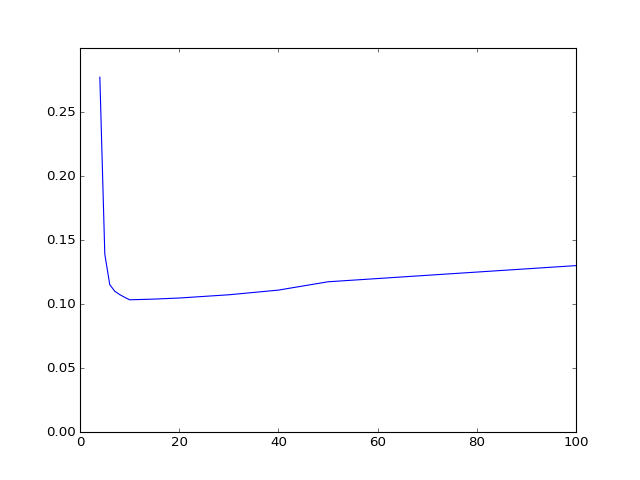

(0, 0.3)

In [8]:
FDR = np.array([0.27718861487873825, 0.13890207399200805, 0.11511433045270276, 0.11001518691319261, 0.10735501119509454, 0.10525590538410612, 0.1032853982080863, 0.10383949757066872, 
                0.1046756841026656, 0.1072019150351418, 0.11085799247905724, 0.11735995569742311, 0.12999784337044487])
plt.figure()
plt.plot(ss, FDR)
plt.ylim([0,0.3])

In [4]:
# increase group C size to 2000
# DS FDR
ss = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
B = 100
FDR = []
fdr = []
sig = []
for j in ss:
    for i in range(B):
        data,labels=simulation_v2.simulatedat(numsamples=j,numdiff=100,numc=2000,numd=800,sigma=0.1,
                                              normalize = True, numreads=10000)
        rej=fdrmethods_v2.dsfdr(data, labels, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='dsfdr')[0]  # important difference '[0]'
        v = np.sum(np.where(rej)[0]>=100)
        r = np.sum(rej)
        sig.append(r)
        fdr.append(v/r)   
    FDR.append(np.nanmean(fdr))    
    print('sample size: %s\ rejections: %s' %(j, np.mean(sig)))
    print('sample size: %s\ FDR: %s' %(j, np.nanmean(fdr))) 
print(FDR)    



/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 4\ rejections: 28.63
sample size: 4\ FDR: 0.375134400162


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 5\ rejections: 47.505
sample size: 5\ FDR: 0.206337308458


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 6\ rejections: 66.73
sample size: 6\ FDR: 0.145217363166


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in long_scalars


sample size: 7\ rejections: 76.56
sample size: 7\ FDR: 0.122526343734
sample size: 8\ rejections: 83.04
sample size: 8\ FDR: 0.112512337785
sample size: 9\ rejections: 87.485
sample size: 9\ FDR: 0.107904015614
sample size: 10\ rejections: 90.7371428571
sample size: 10\ FDR: 0.105561486729
sample size: 15\ rejections: 93.2
sample size: 15\ FDR: 0.103846849993
sample size: 20\ rejections: 95.1355555556
sample size: 20\ FDR: 0.102736530352
sample size: 30\ rejections: 96.715
sample size: 30\ FDR: 0.102115401798
sample size: 40\ rejections: 98.0836363636
sample size: 40\ FDR: 0.102257388402
sample size: 50\ rejections: 99.3708333333
sample size: 50\ FDR: 0.103497521321
sample size: 100\ rejections: 100.812307692
sample size: 100\ FDR: 0.10642677817
[0.3751344001615613, 0.20633730845844644, 0.14521736316570144, 0.12252634373435328, 0.11251233778495122, 0.10790401561350216, 0.10556148672902577, 0.10384684999255524, 0.10273653035227048, 0.10211540179750038, 0.10225738840157551, 0.10349752132

<IPython.core.display.Javascript object>


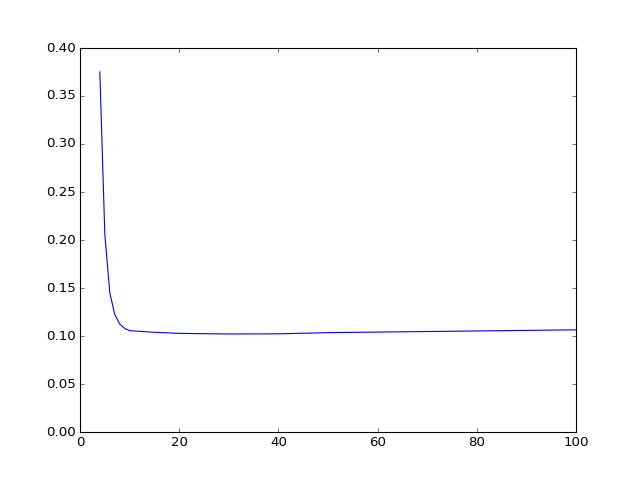

(0, 0.4)

In [9]:
FDR = np.array([0.3751344001615613, 0.20633730845844644, 0.14521736316570144, 0.12252634373435328, 
                0.11251233778495122, 0.10790401561350216, 0.10556148672902577, 0.10384684999255524, 
                0.10273653035227048, 0.10211540179750038, 0.10225738840157551, 0.10349752132105415, 
                0.10642677816974816])
ss = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
plt.figure()
plt.plot(ss, FDR)
plt.ylim([0,0.4])

<IPython.core.display.Javascript object>


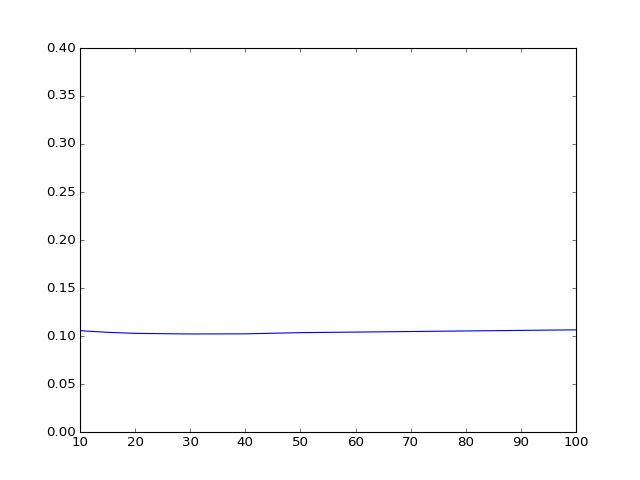

(0, 0.4)

In [11]:
FDR = np.array([0.3751344001615613, 0.20633730845844644, 0.14521736316570144, 0.12252634373435328, 
                0.11251233778495122, 0.10790401561350216, 0.10556148672902577, 0.10384684999255524, 
                0.10273653035227048, 0.10211540179750038, 0.10225738840157551, 0.10349752132105415, 
                0.10642677816974816])
ss = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
plt.figure()
plt.plot(ss[6:13], FDR[6:13])
plt.ylim([0,0.4])

<IPython.core.display.Javascript object>


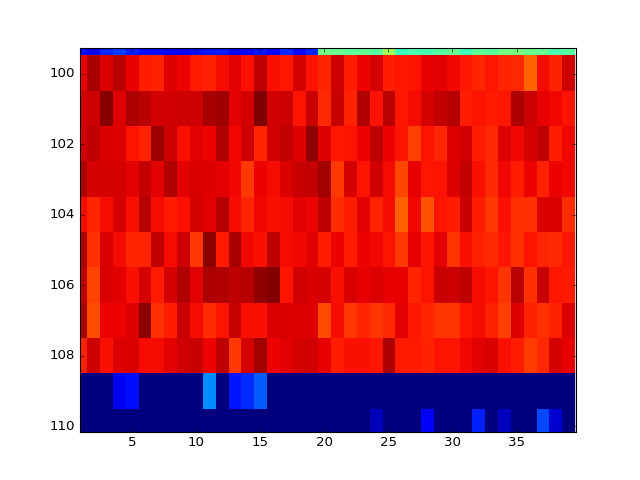

In [8]:
x = data[np.where(n)[0]]

plt.figure()
plt.imshow(x,aspect='auto',interpolation='nearest')



## previous simulation

In [388]:
np.random.seed(31)
data_sim2, labels_sim2 = simulate.simulatemix(numsamples=10,numdiff=100,numc=100,numd=800,noise=0,numreads=10000)


In [389]:
np.random.seed(31)
n = fdrmethods.dsfdr(data_sim2, labels_sim2, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='bhfdr')[0]
r = np.sum(n)
v = np.sum(np.where(n)[0]>=100)
fdr = v/r
print(r)
print(v)
print(fdr) 

41
1
0.0243902439024


In [392]:
np.random.seed(31)
n = fdrmethods.dsfdr(data_sim2, labels_sim2, method='meandiff', transform='rank', 
            alpha=0.1, numperm=1000,fdrmethod='dsfdr')[0]
r = np.sum(n)
v = np.sum(np.where(n)[0]>=100)
fdr = v/r
print(r)
print(v)
print(fdr) 

45
1
0.0222222222222


In [395]:
fdr = 0.1
np.testing.assert_equal(fdr<=0.1, True)